In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
from copy import deepcopy

In [44]:
#Definition of global parameters
Niter=1000
M=1000
delta=0.003   #1/((M/2)-1)
w_1=1.
m=np.arange(1,M+1)
epsilon=0.001
Delta=1.
g=np.arange(0,2,0.01) 

#colors for the plotting
c1='#140b34'
c2='#84206b'
c3='#e55c30'
c4='#f6d746'
colors=[c3, c2, c4, c1]

#Definition of final lists for 1st parametrization (f_m = -c_k/(W+w_k) ; l_m = c_k*epsilon_r/(w_k*(W+w_k))
epsilon_r_final_param1=[]
Delta_r_final_param1=[]
E_gs_final_param1=[]
sigma_x_med_param1=[]
sigma_z_med_param1=[]

#Definition of final lists for 2nd parametrization (f_m = -c_k/w_k ; l_m = 0)
epsilon_r_final_param2=[]
Delta_r_final_param2=[]
E_gs_final_param2=[]
sigma_x_med_param2=[]
sigma_z_med_param2=[]

#Definition of the difference of Egs between 1st and 2nd parametrization for the evaluation
deltaE_gs_12=[]

In [45]:
def eigenvalue(Del,eps): #def W
    return np.sqrt(Del**2 + eps**2)

#print(eigenvalue(Delta,epsilon))
#print(np.sqrt(1**2 + 0.1**2))

In [46]:
def coupling_m(n,coup): #def g_m
    return coup*np.sin(n*np.pi/2.)*np.sqrt(n)/(1.+delta*(n-1.))

#print(coupling_m(m,0.2))
#print(0.2*np.sin(3*np.pi/2.)*np.sqrt(3)/(1.+delta*(3-1.)))

In [47]:
def f_variational_param1(n,coup,Del,eps): #def f_m
    return -coupling_m(n,coup)/(eigenvalue(Del,eps)+n*w_1)

#print(f_variational(m,0.2,Delta,epsilon))
#print(-coupling_m(3,0.2)/(eigenvalue(Delta,epsilon)+3*w_1))

In [48]:
def f_variational_param2(n,coup,Del,eps): #def f_m
    return -coupling_m(n,coup)/(n*w_1)

In [49]:
def l_variational_param1(n,coup,Del,eps): #def l_m
    step=(coupling_m(n,coup)*eps)/(n*w_1*(eigenvalue(Del,eps)+n*w_1))
    #step=[x for x in step if math.isnan(x) == False]
    return step

#print(l_variational(m,0.2,Delta,epsilon)) #PROBLEMA - El primer término es un "nan" y entonces me dará problemas después
#print((coupling_m(3,0.2)*epsilon)/(3*w_1*(eigenvalue(Delta,epsilon)+3*w_1)))

In [50]:
def l_variational_param2(n,coup,Del,eps): #def l_m
    x=0
    return x

In [51]:
def energy_gs_param1(n,coup,Del,eps): #def E_gs
    #np.seterr(invalid='ignore')
    term_1=coupling_m(n,coup)*f_variational_param1(n,coup,Del,eps)
    #print(term_1)
    term_2=n*w_1*((f_variational_param1(n,coup,Del,eps)**2)+(l_variational_param1(n,coup,Del,eps)**2))
    #print(term_2)
    sum_1=np.nansum(term_1)
    #print(sum_1)
    sum_2=np.nansum(term_2)
    #print(sum_2)   #-   PROBLEMA - El primer término de term_2 es un "nan" y entonces sum_2 sale nan y el resultado nan
    return -(eigenvalue(Del,eps)/2)+2*sum_1+sum_2

#print(energy_gs(m,0.83,0.08,0.22))
#print(-(eigenvalue(Delta,epsilon)/2)+2*np.nansum(coupling_m(m,0.2)*f_variational(m,0.2,Delta,epsilon))+np.nansum(m*w_1*((f_variational(m,0.2,Delta,epsilon)**2)+(l_variational(m,0.2,Delta,epsilon)**2))))

In [52]:
def energy_gs_param2(n,coup,Del,eps): #def E_gs
    #np.seterr(invalid='ignore')
    term_1=coupling_m(n,coup)*f_variational_param2(n,coup,Del,eps)
    #print(term_1)
    term_2=n*w_1*((f_variational_param2(n,coup,Del,eps)**2)+(l_variational_param2(n,coup,Del,eps)**2))
    #print(term_2)
    sum_1=np.nansum(term_1)
    #print(sum_1)
    sum_2=np.nansum(term_2)
    #print(sum_2)   #-   PROBLEMA - El primer término de term_2 es un "nan" y entonces sum_2 sale nan y el resultado nan
    return -(eigenvalue(Del,eps)/2)+2*sum_1+sum_2

In [53]:
def f_Delta_r_param1(n,coup,Del,eps):
    f_m=f_variational_param1(n,coup,Del,eps)
    patata_1=f_m**2
    return Delta*math.exp(-2*np.nansum(patata_1))

In [54]:
def f_Delta_r_param2(n,coup,Del,eps):
    f_m=f_variational_param2(n,coup,Del,eps)
    patata_1=f_m**2
    return Delta*math.exp(-2*np.nansum(patata_1))

In [55]:
def f_epsilon_r_param1(n,coup,Del,eps):
    g_m=coupling_m(n,coup)
    f_m=f_variational_param1(n,coup,Del,eps)
    l_m=l_variational_param1(n,coup,Del,eps)
    patata_2=l_m*(g_m+m*w_1*f_m)
    return epsilon+4*np.nansum(patata_2)

In [56]:
def f_epsilon_r_param2(n,coup,Del,eps):
    g_m=coupling_m(n,coup)
    f_m=f_variational_param2(n,coup,Del,eps)
    l_m=l_variational_param2(n,coup,Del,eps)
    patata_2=l_m*(g_m+m*w_1*f_m)
    return epsilon+4*np.nansum(patata_2)

In [57]:
k=0
for i in range(np.size(g)):
    #Initialization
    g_aux=g[i]
    print("g",k,"=",g_aux)
    
    Delta_r_aux_1=deepcopy(Delta)
    epsilon_r_aux_1=deepcopy(epsilon)
    
    Delta_r_aux_2=deepcopy(Delta)
    epsilon_r_aux_2=deepcopy(epsilon)

    #It makes the process once to obtain 2 first values of each Delta_r and epsilon_r to compare the error
    Delta_r_1=deepcopy(f_Delta_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
    epsilon_r_1=deepcopy(f_epsilon_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        
    Delta_r_2=deepcopy(f_Delta_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    epsilon_r_2=deepcopy(f_epsilon_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    
    #Assignments
    Delta_r_old_1=deepcopy(Delta_r_aux_1)
    epsilon_r_old_1=deepcopy(epsilon_r_aux_1)
    Delta_r_aux_1=deepcopy(Delta_r_1)
    epsilon_r_aux_1=deepcopy(epsilon_r_1)
    
    Err_Delta_1=deepcopy(np.sqrt(abs(Delta_r_aux_1-Delta_r_old_1)**2))
    Err_epsilon_1=deepcopy(np.sqrt(abs(epsilon_r_aux_1-epsilon_r_old_1)**2))
    
    Delta_r_old_2=deepcopy(Delta_r_aux_2)
    epsilon_r_old_2=deepcopy(epsilon_r_aux_2)
    Delta_r_aux_2=deepcopy(Delta_r_2)
    epsilon_r_aux_2=deepcopy(epsilon_r_2)
    
    Err_Delta_2=deepcopy(np.sqrt(abs(Delta_r_aux_2-Delta_r_old_2)**2))
    Err_epsilon_2=deepcopy(np.sqrt(abs(epsilon_r_aux_2-epsilon_r_old_2)**2))
    
    #Termalization until it arrives to Niter steps or until sqrt(abs(Ar'-Ar)**2) & sqrt(abs(er'-er)**2) is <10**(-3) :
    j=0
    while ((Err_Delta_1>=0.0001) and (Err_epsilon_1>=0.0001) and (Err_Delta_2>=0.0001) and (Err_epsilon_2>=0.0001)):
        #Repeats the process until it obtais stable values of each Delta_r and epsilon_r
        Delta_r_1=deepcopy(f_Delta_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        epsilon_r_1=deepcopy(f_epsilon_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        
        Delta_r_2=deepcopy(f_Delta_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
        epsilon_r_2=deepcopy(f_epsilon_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    
        #Assignments
        Delta_r_old_1=deepcopy(Delta_r_aux_1)
        epsilon_r_old_1=deepcopy(epsilon_r_aux_1)
        Delta_r_aux_1=deepcopy(Delta_r_1)
        epsilon_r_aux_1=deepcopy(epsilon_r_1)
    
        Err_Delta_1=deepcopy(np.sqrt(abs(Delta_r_aux_1-Delta_r_old_1)**2))
        Err_epsilon_1=deepcopy(np.sqrt(abs(epsilon_r_aux_1-epsilon_r_old_1)**2))
    
        Delta_r_old_2=deepcopy(Delta_r_aux_2)
        epsilon_r_old_2=deepcopy(epsilon_r_aux_2)
        Delta_r_aux_2=deepcopy(Delta_r_2)
        epsilon_r_aux_2=deepcopy(epsilon_r_2)
    
        Err_Delta_2=deepcopy(np.sqrt(abs(Delta_r_aux_2-Delta_r_old_2)**2))
        Err_epsilon_2=deepcopy(np.sqrt(abs(epsilon_r_aux_2-epsilon_r_old_2)**2))
        
        j=j+1
        if (j==Niter):
            print("He llegado hasta la iteración 1000 antes de una solución") #ahota 10000 que no lo he cambiado
            break
            
    E_gs_1=deepcopy(energy_gs_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
    sigma_z_1=deepcopy(-epsilon_r_aux_1/eigenvalue(Delta_r_aux_1,epsilon_r_aux_1))
    sigma_x_1=deepcopy(-Delta_r_aux_1**2/(Delta*eigenvalue(Delta_r_aux_1,epsilon_r_aux_1)))
    print("E_gs_1 = ",E_gs_1)
    print("Delta_r_1 =",Delta_r_aux_1)
    print("epsilon_r_1 =",epsilon_r_aux_1)
    print("sigma_z_1=",sigma_z_1)                  
    print("sigma_x_1=",sigma_x_1)
    print("\n")
    Delta_r_final_param1.append(Delta_r_aux_1)
    epsilon_r_final_param1.append(epsilon_r_aux_1)
    E_gs_final_param1.append(E_gs_1)
    sigma_z_med_param1.append(sigma_z_1)
    sigma_x_med_param1.append(sigma_x_1)
    
    
    E_gs_2=deepcopy(energy_gs_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    sigma_z_2=deepcopy(-epsilon_r_aux_2/eigenvalue(Delta_r_aux_2,epsilon_r_aux_2))
    sigma_x_2=deepcopy(-Delta_r_aux_2**2/(Delta*eigenvalue(Delta_r_aux_2,epsilon_r_aux_2)))                  
    print("E_gs_2 = ",E_gs_2)
    print("Delta_r_2 =",Delta_r_aux_2)
    print("epsilon_r_2 =",epsilon_r_aux_2)
    print("sigma_z_2=",sigma_z_2)
    print("sigma_x_2=",sigma_x_2)
    print("\n")
    Delta_r_final_param2.append(Delta_r_aux_2)
    epsilon_r_final_param2.append(epsilon_r_aux_2)
    E_gs_final_param2.append(E_gs_2)
    sigma_z_med_param2.append(sigma_z_2)
    sigma_x_med_param2.append(sigma_x_2)
    
    #Now it makes the comparison between the energies in order to choose the values of one of the two parametrizations
    comparison=deepcopy(E_gs_1-E_gs_2)
    deltaE_gs_12.append(comparison)
    print("deltaE_gs_12 =",comparison)
    print("\n")

    k=k+1



g 0 = 0.0
E_gs_1 =  -0.5000002499999375
Delta_r_1 = 1.0
epsilon_r_1 = 0.001
sigma_z_1= -0.000999999500000375
sigma_x_1= -0.999999500000375


E_gs_2 =  -0.5000002499999375
Delta_r_2 = 1.0
epsilon_r_2 = 0.001
sigma_z_2= -0.000999999500000375
sigma_x_2= -0.999999500000375


deltaE_gs_12 = 0.0


g 1 = 0.01
E_gs_1 =  -0.5123116637641475
Delta_r_1 = 0.9996089096594344
epsilon_r_1 = 0.0010001601369184886
sigma_z_1= -0.0010005509420958102
sigma_x_1= -0.999608409303976


E_gs_2 =  -0.5122435453993756
Delta_r_2 = 0.9993926436214521
epsilon_r_2 = 0.001
sigma_z_2= -0.0010006072245727312
sigma_x_2= -0.999392143317965


deltaE_gs_12 = -6.811836477194078e-05


g 2 = 0.02
E_gs_1 =  -0.5492465989191072
Delta_r_1 = 0.9984365561084163
epsilon_r_1 = 0.0010006405476739545
sigma_z_1= -0.0010022069394603665
sigma_x_1= -0.9984360546840918


E_gs_2 =  -0.5489745377955383
Delta_r_2 = 0.9975727868803971
epsilon_r_2 = 0.001
sigma_z_2= -0.0010024326151593323
sigma_x_2= -0.9975722856642154


deltaE_gs_12 = -0.00027

sigma_z_1= -0.0037233614025751535
sigma_x_1= -0.37609104550513683


E_gs_2 =  -31.47691626410936
Delta_r_2 = 0.21896306083682854
epsilon_r_2 = 0.001
sigma_z_2= -0.0045669327405570385
sigma_x_2= -0.21896077738236489


deltaE_gs_12 = -0.0532307484182013


g 51 = 0.51
E_gs_1 =  -32.79066219197813
Delta_r_1 = 0.36152468987176833
epsilon_r_1 = 0.001416516124988897
sigma_z_1= -0.003918142499160116
sigma_x_1= -0.3615219148264039


E_gs_2 =  -32.73764464901344
Delta_r_2 = 0.2059310519107571
epsilon_r_2 = 0.001
sigma_z_2= -0.004855936977886597
sigma_x_2= -0.20592862395658126


deltaE_gs_12 = -0.05301754296468886


g 52 = 0.52
E_gs_1 =  -34.07646506791612
Delta_r_1 = 0.34724832344277706
epsilon_r_1 = 0.0014330102275932248
sigma_z_1= -0.004126724101524738
sigma_x_1= -0.34724536663644373


E_gs_2 =  -34.02373720568354
Delta_r_2 = 0.1934394804864592
epsilon_r_2 = 0.001
sigma_z_2= -0.005169506429078565
sigma_x_2= -0.19343689575051348


deltaE_gs_12 = -0.052727862232579525


g 53 = 0.53
E_gs_1 =  -35

E_gs_1 =  -138.33696635096015
Delta_r_1 = 0.013398475185509939
epsilon_r_1 = 0.00276550952633702
sigma_z_1= -0.20214374625005696
sigma_x_1= -0.013121875224492029


E_gs_2 =  -138.33117599123952
Delta_r_2 = 0.0012332055543073618
epsilon_r_2 = 0.001
sigma_z_2= -0.6298413288628683
sigma_x_2= -0.0009578601352589381


deltaE_gs_12 = -0.005790359720634797


g 106 = 1.06
E_gs_1 =  -140.9838934201046
Delta_r_1 = 0.012337022561917406
epsilon_r_1 = 0.002799298416138119
sigma_z_1= -0.2212775595610886
sigma_x_1= -0.012031198510045776


E_gs_2 =  -140.9785312453015
Delta_r_2 = 0.001084832711693243
epsilon_r_2 = 0.001
sigma_z_2= -0.6777734455645675
sigma_x_2= -0.0007976458210710945


deltaE_gs_12 = -0.00536217480311052


g 107 = 1.07
E_gs_1 =  -143.6559498351678
Delta_r_1 = 0.01135077665964223
epsilon_r_1 = 0.0028334075797761945
sigma_z_1= -0.24219075907717777
sigma_x_1= -0.011012848732115096


E_gs_2 =  -143.6509896199836
Delta_r_2 = 0.0009531524514119593
epsilon_r_2 = 0.001
sigma_z_2= -0.723858975

E_gs_2 =  -358.35460832789437
Delta_r_2 = 2.911607302086151e-08
epsilon_r_2 = 0.001
sigma_z_2= -0.9999999995761273
sigma_x_2= -8.47745707796803e-13


deltaE_gs_12 = -0.0020721955795011127


g 170 = 1.7
E_gs_1 =  -362.6101248811084
Delta_r_1 = 1.2314642331095102e-05
epsilon_r_1 = 0.005627956944321078
sigma_z_1= -0.9999976060751248
sigma_x_1= -2.6945844505104145e-08


E_gs_2 =  -362.6080323229629
Delta_r_2 = 2.3696657301565643e-08
epsilon_r_2 = 0.001
sigma_z_2= -0.9999999997192341
sigma_x_2= -5.615315671101854e-13


deltaE_gs_12 = -0.0020925581454775966


g 171 = 1.71
E_gs_1 =  -366.88866316483984
Delta_r_1 = 1.0776858423381321e-05
epsilon_r_1 = 0.005682563633525697
sigma_z_1= -0.999998201689945
sigma_x_1= -2.0438041016462582e-08


E_gs_2 =  -366.88655026490517
Delta_r_2 = 1.9262545276847106e-08
epsilon_r_2 = 0.001
sigma_z_2= -0.9999999998144772
sigma_x_2= -3.7104565047374733e-13


deltaE_gs_12 = -0.002112899934672896


g 172 = 1.72
E_gs_1 =  -371.19229537061454
Delta_r_1 = 9.42372901519

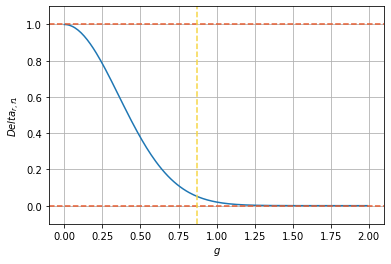

In [58]:
#Delta_r 1st parametrization
plt.plot(g,Delta_r_final_param1)
#np.save("Delta_r_p1_M100",Delta_r_final_param1)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f1}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

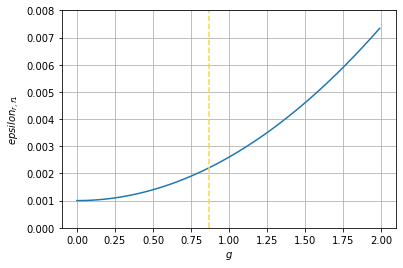

In [59]:
#epsilon_r 1st parametrization
plt.plot(g,epsilon_r_final_param1)
#np.save("epsilon_r_p1_M100",epsilon_r_final_param1)
plt.xlim(-0.1,2.1)
plt.ylim(0,0.008)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f1}$')
plt.axvline(0.87,c=c4,linestyle='--')
plt.axhline(0.22,c=c4,linestyle='--')
plt.grid()
plt.show()

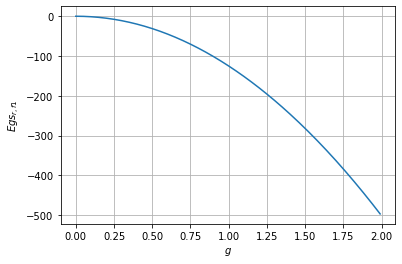

In [60]:
#E_gs 1st parametrization
plt.plot(g,E_gs_final_param1)
#np.save("EGS_p1_M20",E_gs_final_param1)
plt.xlabel('$g$')
plt.ylabel('$Egs_{r,f1}$')
plt.grid()
plt.show()

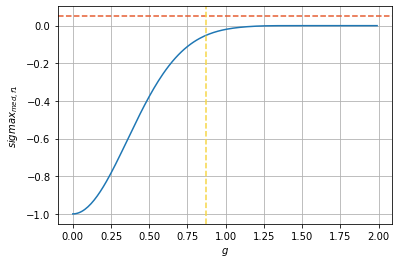

In [70]:
#sigma_x_med 1st parametrization
plt.plot(g,sigma_x_med_param1)
#np.save("sigma_x_p1_M20",sigma_x_med_param1)
#plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f1}$')
#plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3, linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

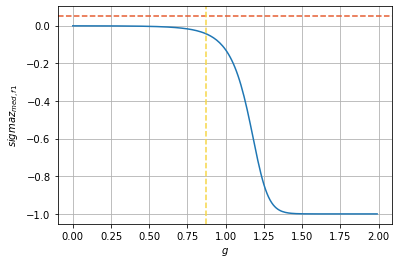

In [69]:
#sigma_z_med 1st parametrization
plt.plot(g,sigma_z_med_param1)
#np.save("sigma_z_p1_M20",sigma_z_med_param1)
#plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmaz_{med,f1}$')
#plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3, linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

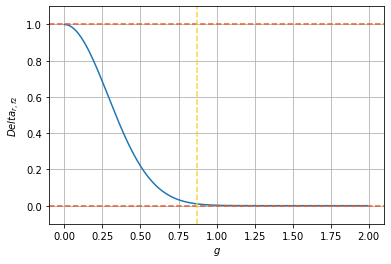

In [63]:
#Delta_r 2nd parametrization
plt.plot(g,Delta_r_final_param2)
#np.save("Delta_r_p2_M100",Delta_r_final_param2)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f2}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

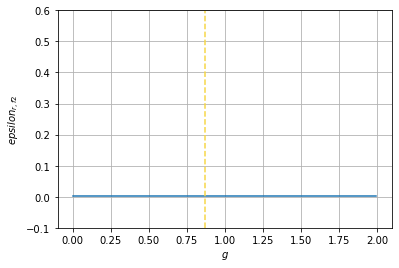

In [64]:
#epsilon_r 2nd parametrization
plt.plot(g,epsilon_r_final_param2)
#np.save("epsilon_r_p2_M1000",epsilon_r_final_param2)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f2}$')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

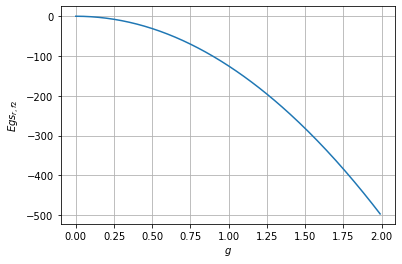

In [65]:
#E_gs 2nd parametrization
plt.plot(g,E_gs_final_param2)
#np.save("EGS_p2_M100",E_gs_final_param2)
#np.save("EGS_p2_M10_renormalized_prueba",E_gs_final_param2)
plt.xlabel('$g$')
plt.ylabel('$Egs_{r,f2}$')
plt.grid()
plt.show()

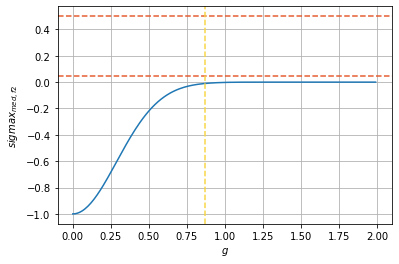

In [66]:
#sigma_x_med 2nd parametrization
plt.plot(g,sigma_x_med_param2)
#np.save("sigma_x_p2_M1",sigma_x_med_param2)
plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f2}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

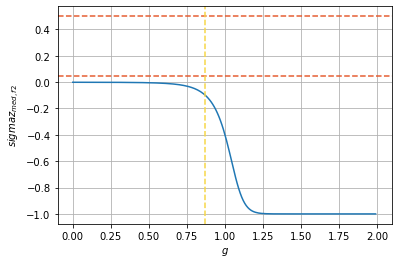

In [67]:
#sigma_z_med 2nd parametrization
plt.plot(g,sigma_z_med_param2)
#np.save("sigma_z_p2_M1000",sigma_x_med_param2)
plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmaz_{med,f2}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

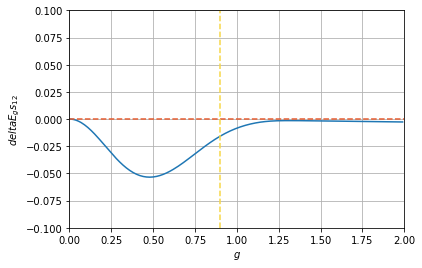

In [68]:
plt.plot(g,deltaE_gs_12)
#np.save("deltaE_gs_M100",deltaE_gs_12)
plt.xlim(0,2)
plt.ylim(-0.1,0.1)
plt.xlabel('$g$')
plt.ylabel('$deltaE_gs_{12}$')
plt.axhline(0,c=c3,linestyle='--')
plt.axvline(0.9,c=c4, linestyle='--')
plt.grid()
plt.show()